In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean,std
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)
df = df.drop('Over18', axis = 1)

df.shape

(1470, 31)

In [4]:
for feature in df.columns:
    if df[feature].dtype not in ['int64','float64']:
        print(f'{feature}: {df[feature].unique()}')

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
final_dataset = pd.get_dummies(df, drop_first = True)
final_dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [7]:
final_dataset.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.040035,-0.075835,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,0.030232,-0.027445,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168,-0.020322
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,-0.022180,0.009035,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,0.036432,-0.033436,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.028324,-0.045253,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.050547,-0.087072,0.000544
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.015710,-0.005620,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.010315,0.024571,0.024539
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.320906,0.619573,0.055684,0.485818,-0.345180,0.047792,-0.201514,0.056767,-0.089361,0.006089


In [8]:
# sns.pairplot(final_dataset) #taking too long as too many features

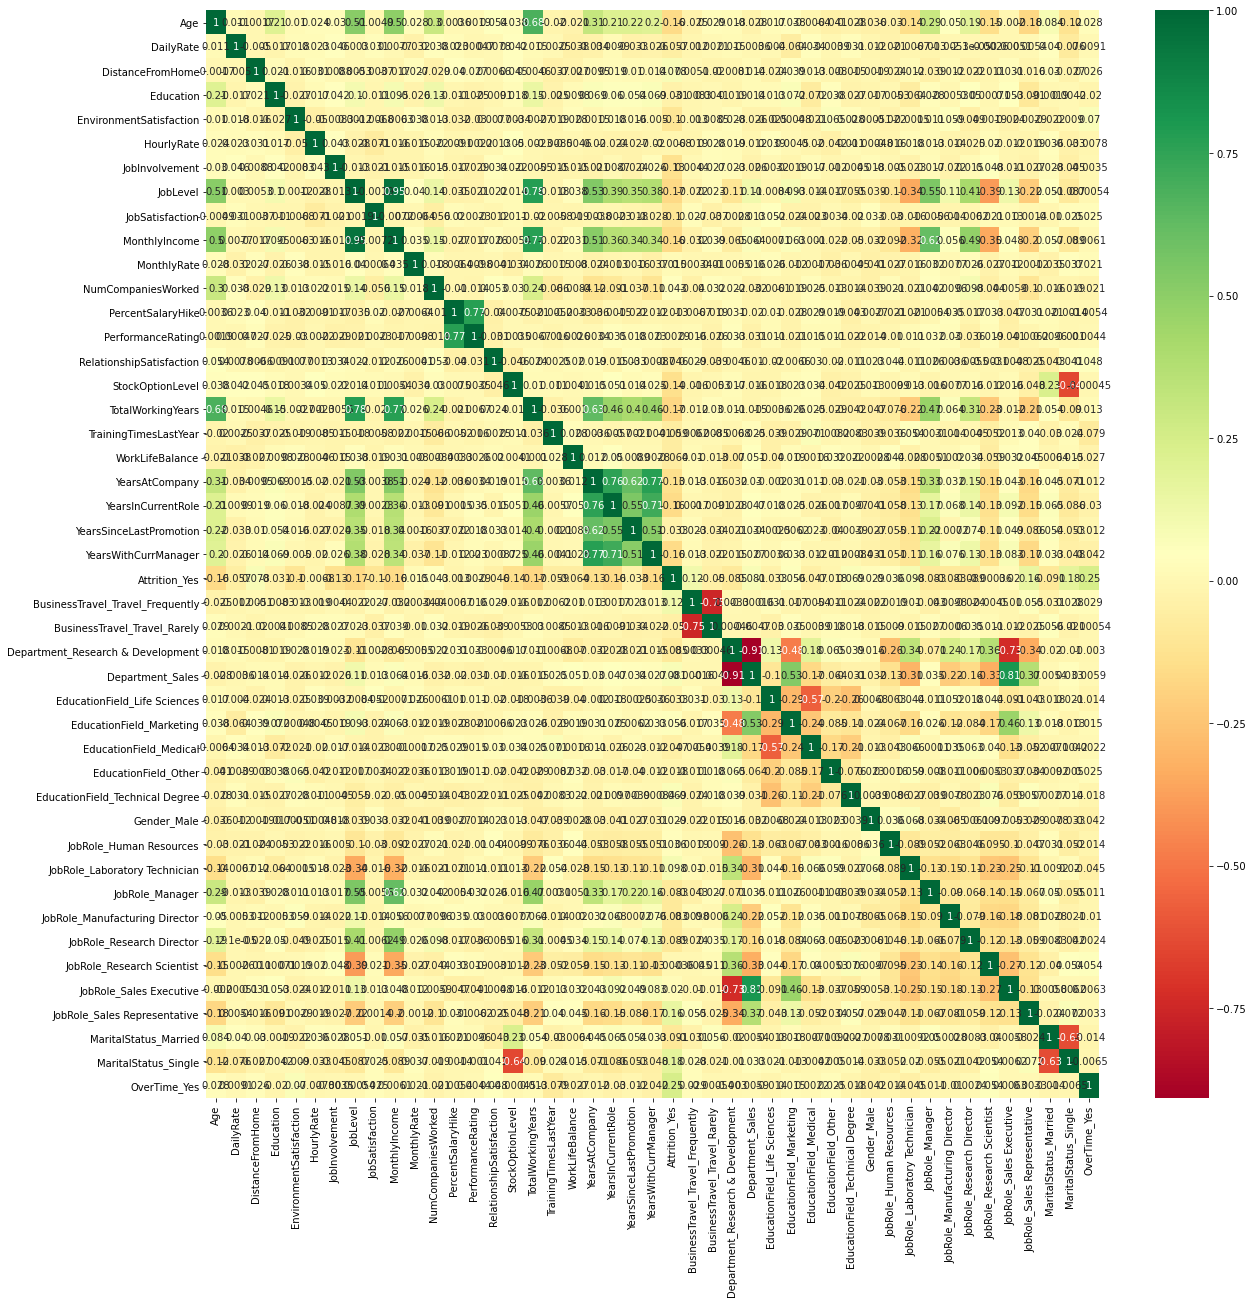

In [9]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heatmap
gh = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap="RdYlGn")

In [13]:
final_dataset.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole

In [17]:
X = final_dataset[final_dataset.columns.difference(['Attrition_Yes'])]
y = final_dataset[['Attrition_Yes']]
print(X)
print(y)

      Age  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0      41                                 0                             1   
1      49                                 1                             0   
2      37                                 0                             1   
3      33                                 1                             0   
4      27                                 0                             1   
...   ...                               ...                           ...   
1465   36                                 1                             0   
1466   39                                 0                             1   
1467   27                                 0                             1   
1468   49                                 1                             0   
1469   34                                 0                             1   

      DailyRate  Department_Research & Development  Department_Sales  \
0  

In [18]:
## Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_)

[0.03888048 0.0202975  0.01367332 0.02817138 0.01023008 0.01039403
 0.0319174  0.02582097 0.01494652 0.01089105 0.01643685 0.00694857
 0.01394168 0.03249333 0.02032369 0.02663651 0.03085714 0.03051363
 0.00642408 0.01643994 0.0039096  0.00576035 0.00284969 0.01157862
 0.0093178  0.01447541 0.03420448 0.01531505 0.02817721 0.03545597
 0.02765744 0.03138201 0.06159104 0.02738154 0.01382422 0.03202293
 0.02628706 0.03675749 0.0255082  0.02960161 0.03368898 0.02861479
 0.02751611 0.03088426]


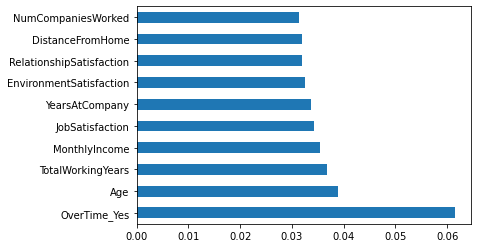

In [22]:
#plot feature mportance
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [44]:
feat_importance.sort_values(ascending=False)

OverTime_Yes                         0.061591
Age                                  0.038880
TotalWorkingYears                    0.036757
MonthlyIncome                        0.035456
JobSatisfaction                      0.034204
YearsAtCompany                       0.033689
EnvironmentSatisfaction              0.032493
RelationshipSatisfaction             0.032023
DistanceFromHome                     0.031917
NumCompaniesWorked                   0.031382
YearsWithCurrManager                 0.030884
JobInvolvement                       0.030857
JobLevel                             0.030514
WorkLifeBalance                      0.029602
YearsInCurrentRole                   0.028615
MaritalStatus_Single                 0.028177
DailyRate                            0.028171
MonthlyRate                          0.027657
YearsSinceLastPromotion              0.027516
PercentSalaryHike                    0.027382
HourlyRate                           0.026637
StockOptionLevel                  

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
X_train.shape

(1176, 44)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [31]:
prediction = rf.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Random Forest Accuracy = "{:.3f}%"'.format((TP + TN) / (TP + TN + FN + FP)*100))
print('Random Forest Recall / Sensitivity / TPR = "{:.3f}%"'.format((TP) / (TP + FN)*100))
# print('Random Forest Recall / Specificity / TNR = "{:.3f}%"'.format((TN) / (TN + FP)*100))
print('Random Forest Precision / PPV = "{:.3f}%"'.format((TP) / (TP + FP)*100))
# print('Random Forest FPR = "{:.3f}%"'.format((FP) / (TN + FP)*100))
print('Random Forest F1 score = "{:.3f}%"'.format((2 * TP) / ((2 * TP) + FP + FN)*100))

[[240   1]
 [ 47   6]]
Random Forest Accuracy = "83.673%"
Random Forest Recall / Sensitivity / TPR = "11.321%"
Random Forest Precision / PPV = "85.714%"
Random Forest F1 score = "20.000%"


In [40]:
import pickle

#open a file, to store the data
file = open('random_forest_classification_model.pkl', 'wb')

#dump the model information to  that file
pickle.dump(rf, file)

# Reducing Columns - Top 10 Features

In [74]:
X_top = final_dataset[['OverTime_Yes', 'Age', 'TotalWorkingYears', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'DistanceFromHome', 'NumCompaniesWorked']]

In [75]:
X_top.head()

,OverTime_Yes,Age,TotalWorkingYears,MonthlyIncome,JobSatisfaction,YearsAtCompany,EnvironmentSatisfaction,RelationshipSatisfaction,DistanceFromHome,NumCompaniesWorked
0,1,41,8,5993,4,6,2,1,1,8
1,0,49,10,5130,2,10,3,4,8,1
2,1,37,7,2090,3,0,4,2,2,6
3,1,33,8,2909,3,8,4,3,3,1
4,0,27,6,3468,2,2,1,4,2,9


In [76]:
X_top.describe()

,OverTime_Yes,Age,TotalWorkingYears,MonthlyIncome,JobSatisfaction,YearsAtCompany,EnvironmentSatisfaction,RelationshipSatisfaction,DistanceFromHome,NumCompaniesWorked
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.282993,36.923810,11.279592,6502.931293,2.728571,7.008163,2.721769,2.712245,9.192517,2.693197
std,0.450606,9.135373,7.780782,4707.956783,1.102846,6.126525,1.093082,1.081209,8.106864,2.498009
min,0.000000,18.000000,0.000000,1009.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,30.000000,6.000000,2911.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
50%,0.000000,36.000000,10.000000,4919.000000,3.000000,5.000000,3.000000,3.000000,7.000000,2.000000
75%,1.000000,43.000000,15.000000,8379.000000,4.000000,9.000000,4.000000,4.000000,14.000000,4.000000
max,1.000000,60.000000,40.000000,19999.000000,4.000000,40.000000,4.000000,4.000000,29.000000,9.000000


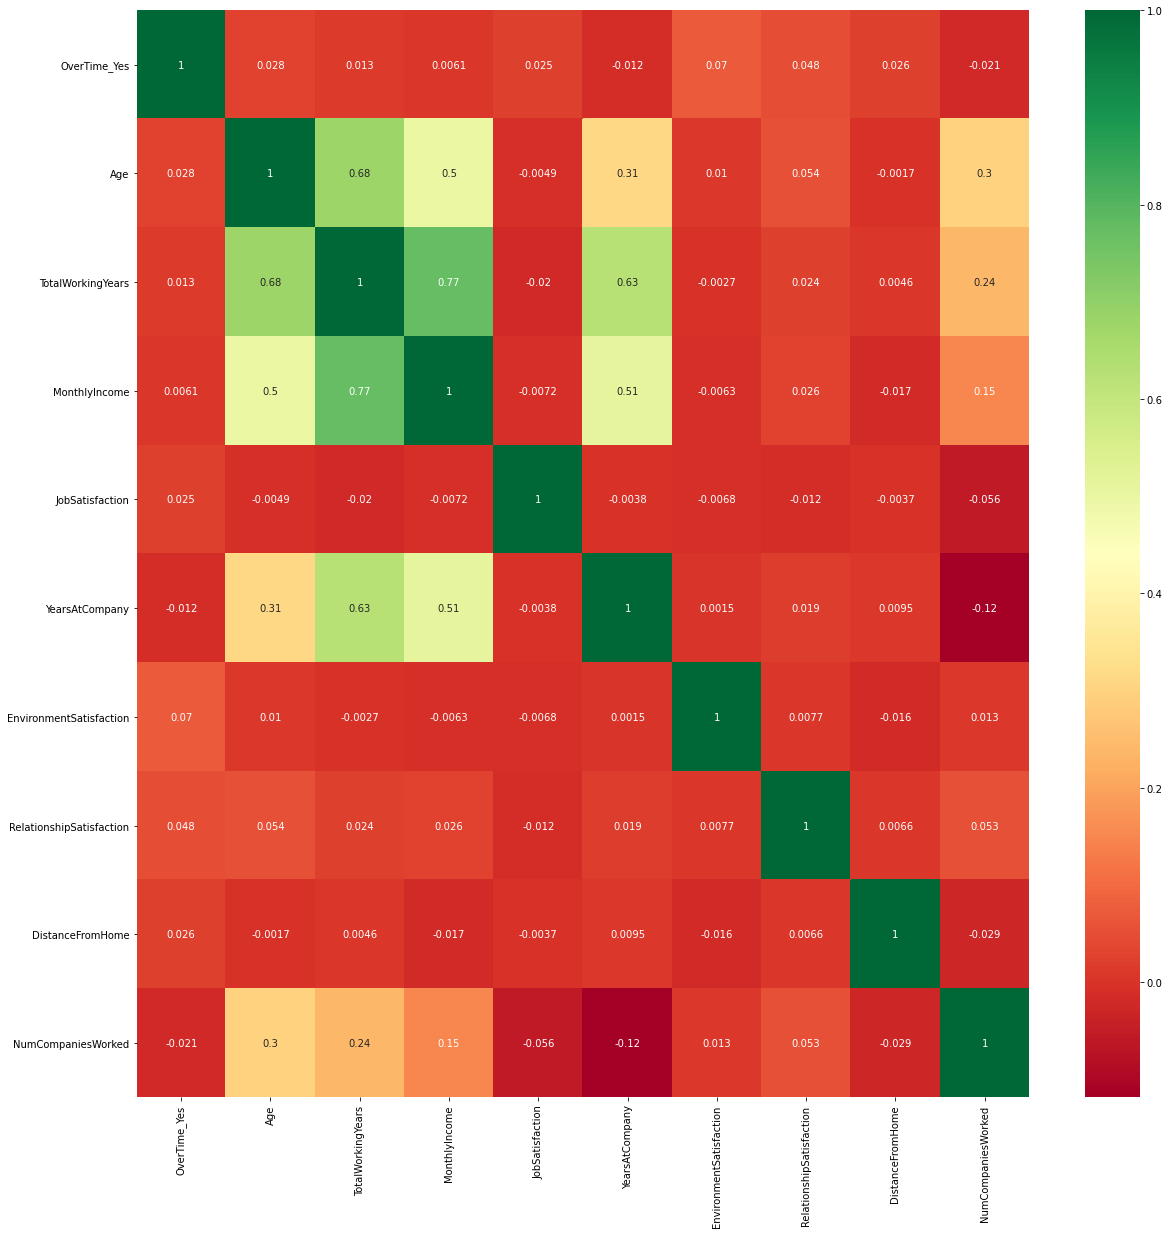

In [77]:
corrmat = X_top.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heatmap
gh = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap="RdYlGn")

In [78]:
## Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_top,y)

ExtraTreesClassifier()

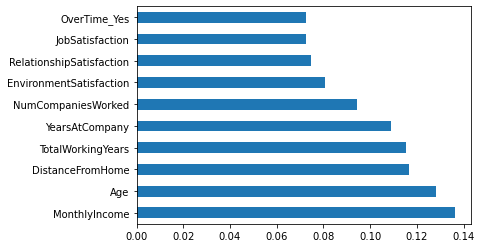

In [79]:
#plot feature mportance
feat_importance = pd.Series(model.feature_importances_, index = X_top.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size = 0.2)

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Random Forest Accuracy = "{:.3f}%"'.format((TP + TN) / (TP + TN + FN + FP)*100))
print('Random Forest Recall / Sensitivity / TPR = "{:.3f}%"'.format((TP) / (TP + FN)*100))
# print('Random Forest Recall / Specificity / TNR = "{:.3f}%"'.format((TN) / (TN + FP)*100))
print('Random Forest Precision / PPV = "{:.3f}%"'.format((TP) / (TP + FP)*100))
# print('Random Forest FPR = "{:.3f}%"'.format((FP) / (TN + FP)*100))
print('Random Forest F1 score = "{:.3f}%"'.format((2 * TP) / ((2 * TP) + FP + FN)*100))

[[236   9]
 [ 40   9]]
Random Forest Accuracy = "83.333%"
Random Forest Recall / Sensitivity / TPR = "18.367%"
Random Forest Precision / PPV = "50.000%"
Random Forest F1 score = "26.866%"


In [83]:
import pickle

#open a file, to store the data
file = open('random_forest_classification_model_top.pkl', 'wb')

#dump the model information to  that file
pickle.dump(rf, file)

In [84]:
X_top.dtypes

OverTime_Yes                uint8
Age                         int64
TotalWorkingYears           int64
MonthlyIncome               int64
JobSatisfaction             int64
YearsAtCompany              int64
EnvironmentSatisfaction     int64
RelationshipSatisfaction    int64
DistanceFromHome            int64
NumCompaniesWorked          int64
dtype: object